Yet another 10,000 foot view @ [`https://github.com/squillero/10k`](https://github.com/squillero/10k)  
Copyright **©** 2022 Giovanni Squillero `<squillero@polito.it>`  
Free for personal or classroom use; see the [license](https://github.com/squillero/10k/blob/main/LICENSE.md) for details.  

------------------------------------------------------------

# Neural Networks

In [30]:
import math
import numpy as np
import sympy
import matplotlib.pyplot as plt

In [31]:
sympy.init_printing(forecolor="black")

## Create dataset

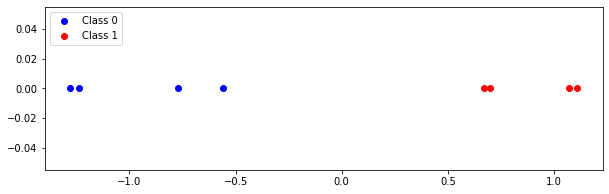

In [32]:
POINTS = 4
SCALE = 0.5
class0 = np.around(np.random.normal(loc=-1, scale=SCALE, size=POINTS), decimals=2)
class1 = np.around(np.random.normal(loc=1, scale=SCALE, size=POINTS), decimals=2)
plt.figure(figsize=(10, 3))
plt.scatter(x=class0, y=np.zeros(POINTS), c="blue", label="Class 0")
plt.scatter(x=class1, y=np.zeros(POINTS), c="red", label="Class 1")
plt.legend(loc="upper left")
None

## Handmade Neural network

Activation: sigmoid

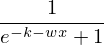

In [33]:
x_, k_, w_ = sympy.symbols("x k w")
nn = 1 / (1 + sympy.exp(-(w_ * x_ + k_)))
nn

### Define *loss* and calculate loss's gradient

In [34]:
loss = 0
for x in class0:
    loss = loss + nn.subs(x_, x) ** 2
for x in class1:
    loss = loss + (nn.subs([(x_, x)]) - 1) ** 2
loss_f = sympy.lambdify((k_, w_), loss)
grad = sympy.derive_by_array(loss, (k_, w_))
grad_f = sympy.lambdify((k_, w_), grad)

Let's plot the loss

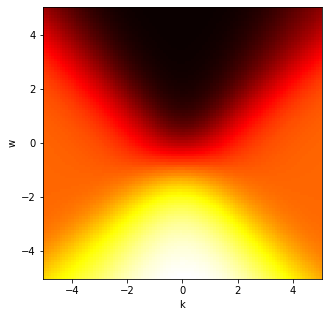

In [35]:
RANGE = 5

plt.figure(figsize=(5, 5))
t = np.linspace(-RANGE, RANGE, 100)
K, W = np.meshgrid(t, t)
plt.pcolormesh(K, W, loss_f(K, W), cmap="hot")
plt.xlabel("k")
plt.ylabel("w")
None

### Optimize NN's parameters 

Simple gradient descent (note: loss in log scale)

 1: [-0.23412098  6.73082366] -> loss = 0.0006566589701002535 / grad = [ 4.68518636e-05 -8.09905051e-04]
 2: [-0.2340328   6.72920778] -> loss = 0.0006579731215242709 / grad = [ 4.69315386e-05 -8.11522369e-04]
 3: [-0.23402068  6.72888177] -> loss = 0.0006582383088478413 / grad = [ 4.69332530e-05 -8.11849565e-04]


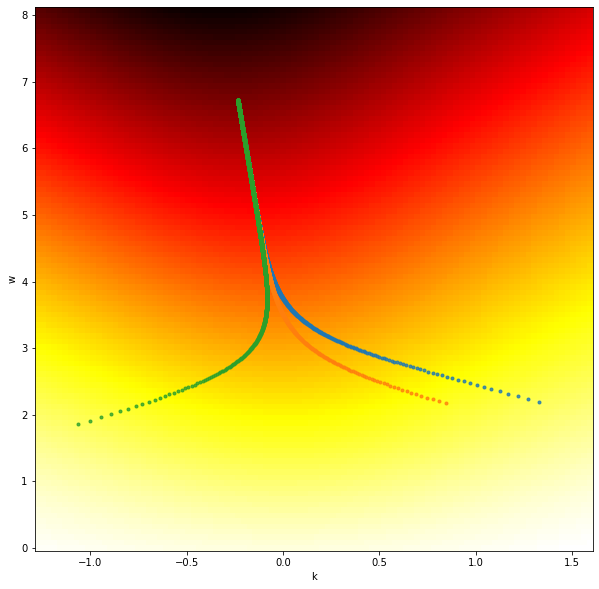

In [36]:
plt.figure(figsize=(10, 10))

minx, miny = 0, 0
maxx, maxy = 0, 0
paths = list()
for lines in range(3):
    points = [np.random.random(2) * RANGE - RANGE / 2]
    for step in range(10_000):
        p = points[-1]
        minx, miny = min(minx, p[0]), min(miny, p[1])
        maxx, maxy = max(maxx, p[0]), max(maxy, p[1])
        l = np.array(loss_f(*p))
        g = np.array(grad_f(*p))
        points.append(p - g / 10)
    paths.append(np.array(points))
    print(f"{lines+1:2d}: {np.array(p)} -> loss = {l} / grad = {g}")

x = np.linspace(minx * 1.2, maxx * 1.2, 100)
y = np.linspace(miny * 1.2, maxy * 1.2, 100)
X, Y = np.meshgrid(x, y)
plt.pcolormesh(X, Y, np.log(loss_f(X, Y)), cmap="hot")
for p in paths:
    plt.scatter(x=p[:, 0], y=p[:, 1], color=None, marker=".", alpha=0.8)

plt.xlabel("k")
plt.ylabel("w")
None

### Plot NN with fitted parameters

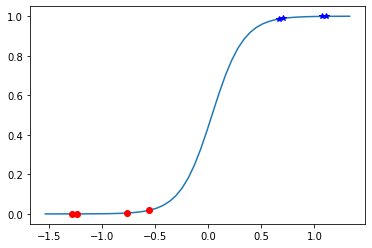

In [37]:
nn_f = sympy.lambdify(x_, nn.subs([(k_, paths[-1][-1][0]), (w_, paths[-1][-1][1])]))
x = np.linspace(min(class0.min(), class1.min()) * 1.2, max(class0.max(), class1.max()) * 1.2)
plt.plot(x, nn_f(x))
for p in class0:
    plt.plot(p, nn_f(p), marker="o", color="red")
for p in class1:
    plt.plot(p, nn_f(p), marker="*", color="blue")